# IS597 MLC - Final Project
# Integrative Predictive Modeling of Diabetes Risk: Leveraging Health Indicators and Socio-Demographic Factors

- Name - Vaishnavi Jayarama
- netid - vj15

# Part 1

In [3]:
!pip install xgboost

In [4]:
import pandas as pd
from sklearn.utils import resample


#Load the dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

In [5]:
column_names = data.columns.tolist()
column_names[column_names.index('Diabetes_012')] = 'Diabetes_binary'
data.columns = column_names

print(data.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [6]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
data.value_counts('Diabetes_binary')

Diabetes_binary
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Thus, there is a need to balance the dataset

# Balancing the dataset

In [8]:
#Creating a 50-50 split of no diabetes and diabetes cases

#Separate the data into no diabetes (0) and prediabetes(1)/diabetes (2)
no_diabetes = data[data['Diabetes_binary'] == 0]
diabetes1 = data[data['Diabetes_binary'] == 1]
diabetes2 = data[data['Diabetes_binary'] == 2].astype(int)

diabetes2['Diabetes_binary'] = 1

#Check the imbalance
print("Original counts:")
print("No diabetes: ", len(no_diabetes))
print("Prediabetes: ", len(diabetes1))
print("Diabetes: ", len(diabetes2))

#Balance the dataset by downsampling the larger class
if len(no_diabetes) > len(diabetes2):
    no_diabetes_downsampled = resample(no_diabetes,
                                       replace=False,  #Sample without replacement
                                       n_samples=len(diabetes2),  #Match number in minority class
                                       random_state=42)  #Reproducible results
    diabetes_data = pd.concat([no_diabetes_downsampled, diabetes2])
else:
    diabetes_upsampled = resample(diabetes2,
                                  replace=True,  #Sample with replacement
                                  n_samples=len(no_diabetes),  #Match number in majority class
                                  random_state=42)  #Reproducible results
    diabetes_data = pd.concat([no_diabetes, diabetes_upsampled])

#Shuffle the dataset to prevent any order bias
diabetes_data = diabetes_data.sample(frac=1, random_state=42).reset_index(drop=True)

diabetes_data.to_csv('diabetes_binary_balanced_BRFSS2015.csv', index=False)

print("Balanced dataset shape:", diabetes_data.shape)
print(diabetes_data['Diabetes_binary'].value_counts())

Original counts:
No diabetes:  213703
Prediabetes:  4631
Diabetes:  35346
Balanced dataset shape: (70692, 22)
Diabetes_binary
1.0    35346
0.0    35346
Name: count, dtype: int64


Considered only diabetes cases as diabetes and balanced the dataset by performing a 50-50 split of diabetes and non-diabetes cases

# Exploratory Data Analysis

In [9]:
#Display the first few rows of the dataset
diabetes_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
1,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
2,0.0,0.0,0.0,1.0,25.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,7.0,30.0,1.0,0.0,6.0,5.0,6.0
3,0.0,0.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,4.0,0.0,0.0,0.0,0.0,8.0,4.0,5.0
4,1.0,1.0,0.0,1.0,47.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,30.0,10.0,1.0,1.0,6.0,6.0,3.0


In [10]:
#Balanced dataset columns and missing values
diabetes_data.columns, diabetes_data.isnull().sum()

(Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
        'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
        'Income'],
       dtype='object'),
 Diabetes_binary         0
 HighBP                  0
 HighChol                0
 CholCheck               0
 BMI                     0
 Smoker                  0
 Stroke                  0
 HeartDiseaseorAttack    0
 PhysActivity            0
 Fruits                  0
 Veggies                 0
 HvyAlcoholConsump       0
 AnyHealthcare           0
 NoDocbcCost             0
 GenHlth                 0
 MentHlth                0
 PhysHlth                0
 DiffWalk                0
 Sex                     0
 Age                     0
 Education               0
 Income                  0
 dtype: int64)

In [11]:
#Basic statistics 
diabetes_data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.00000,70692.000000
mean,0.500000,0.560785,0.526368,0.974608,29.821423,0.473986,0.061733,0.146905,0.702852,0.613181,...,0.955469,0.092825,2.832753,3.712358,5.787359,0.253211,0.457025,8.588270,4.92630,5.719968
std,0.500004,0.496295,0.499308,0.157313,7.090069,0.499326,0.240671,0.354014,0.457006,0.487025,...,0.206274,0.290189,1.111740,8.113046,10.042061,0.434854,0.498153,2.856412,1.02879,2.172299
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.00000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.00000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,5.000000,1.000000,1.000000,11.000000,6.00000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.00000,8.000000


In [12]:
#Import neccesary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

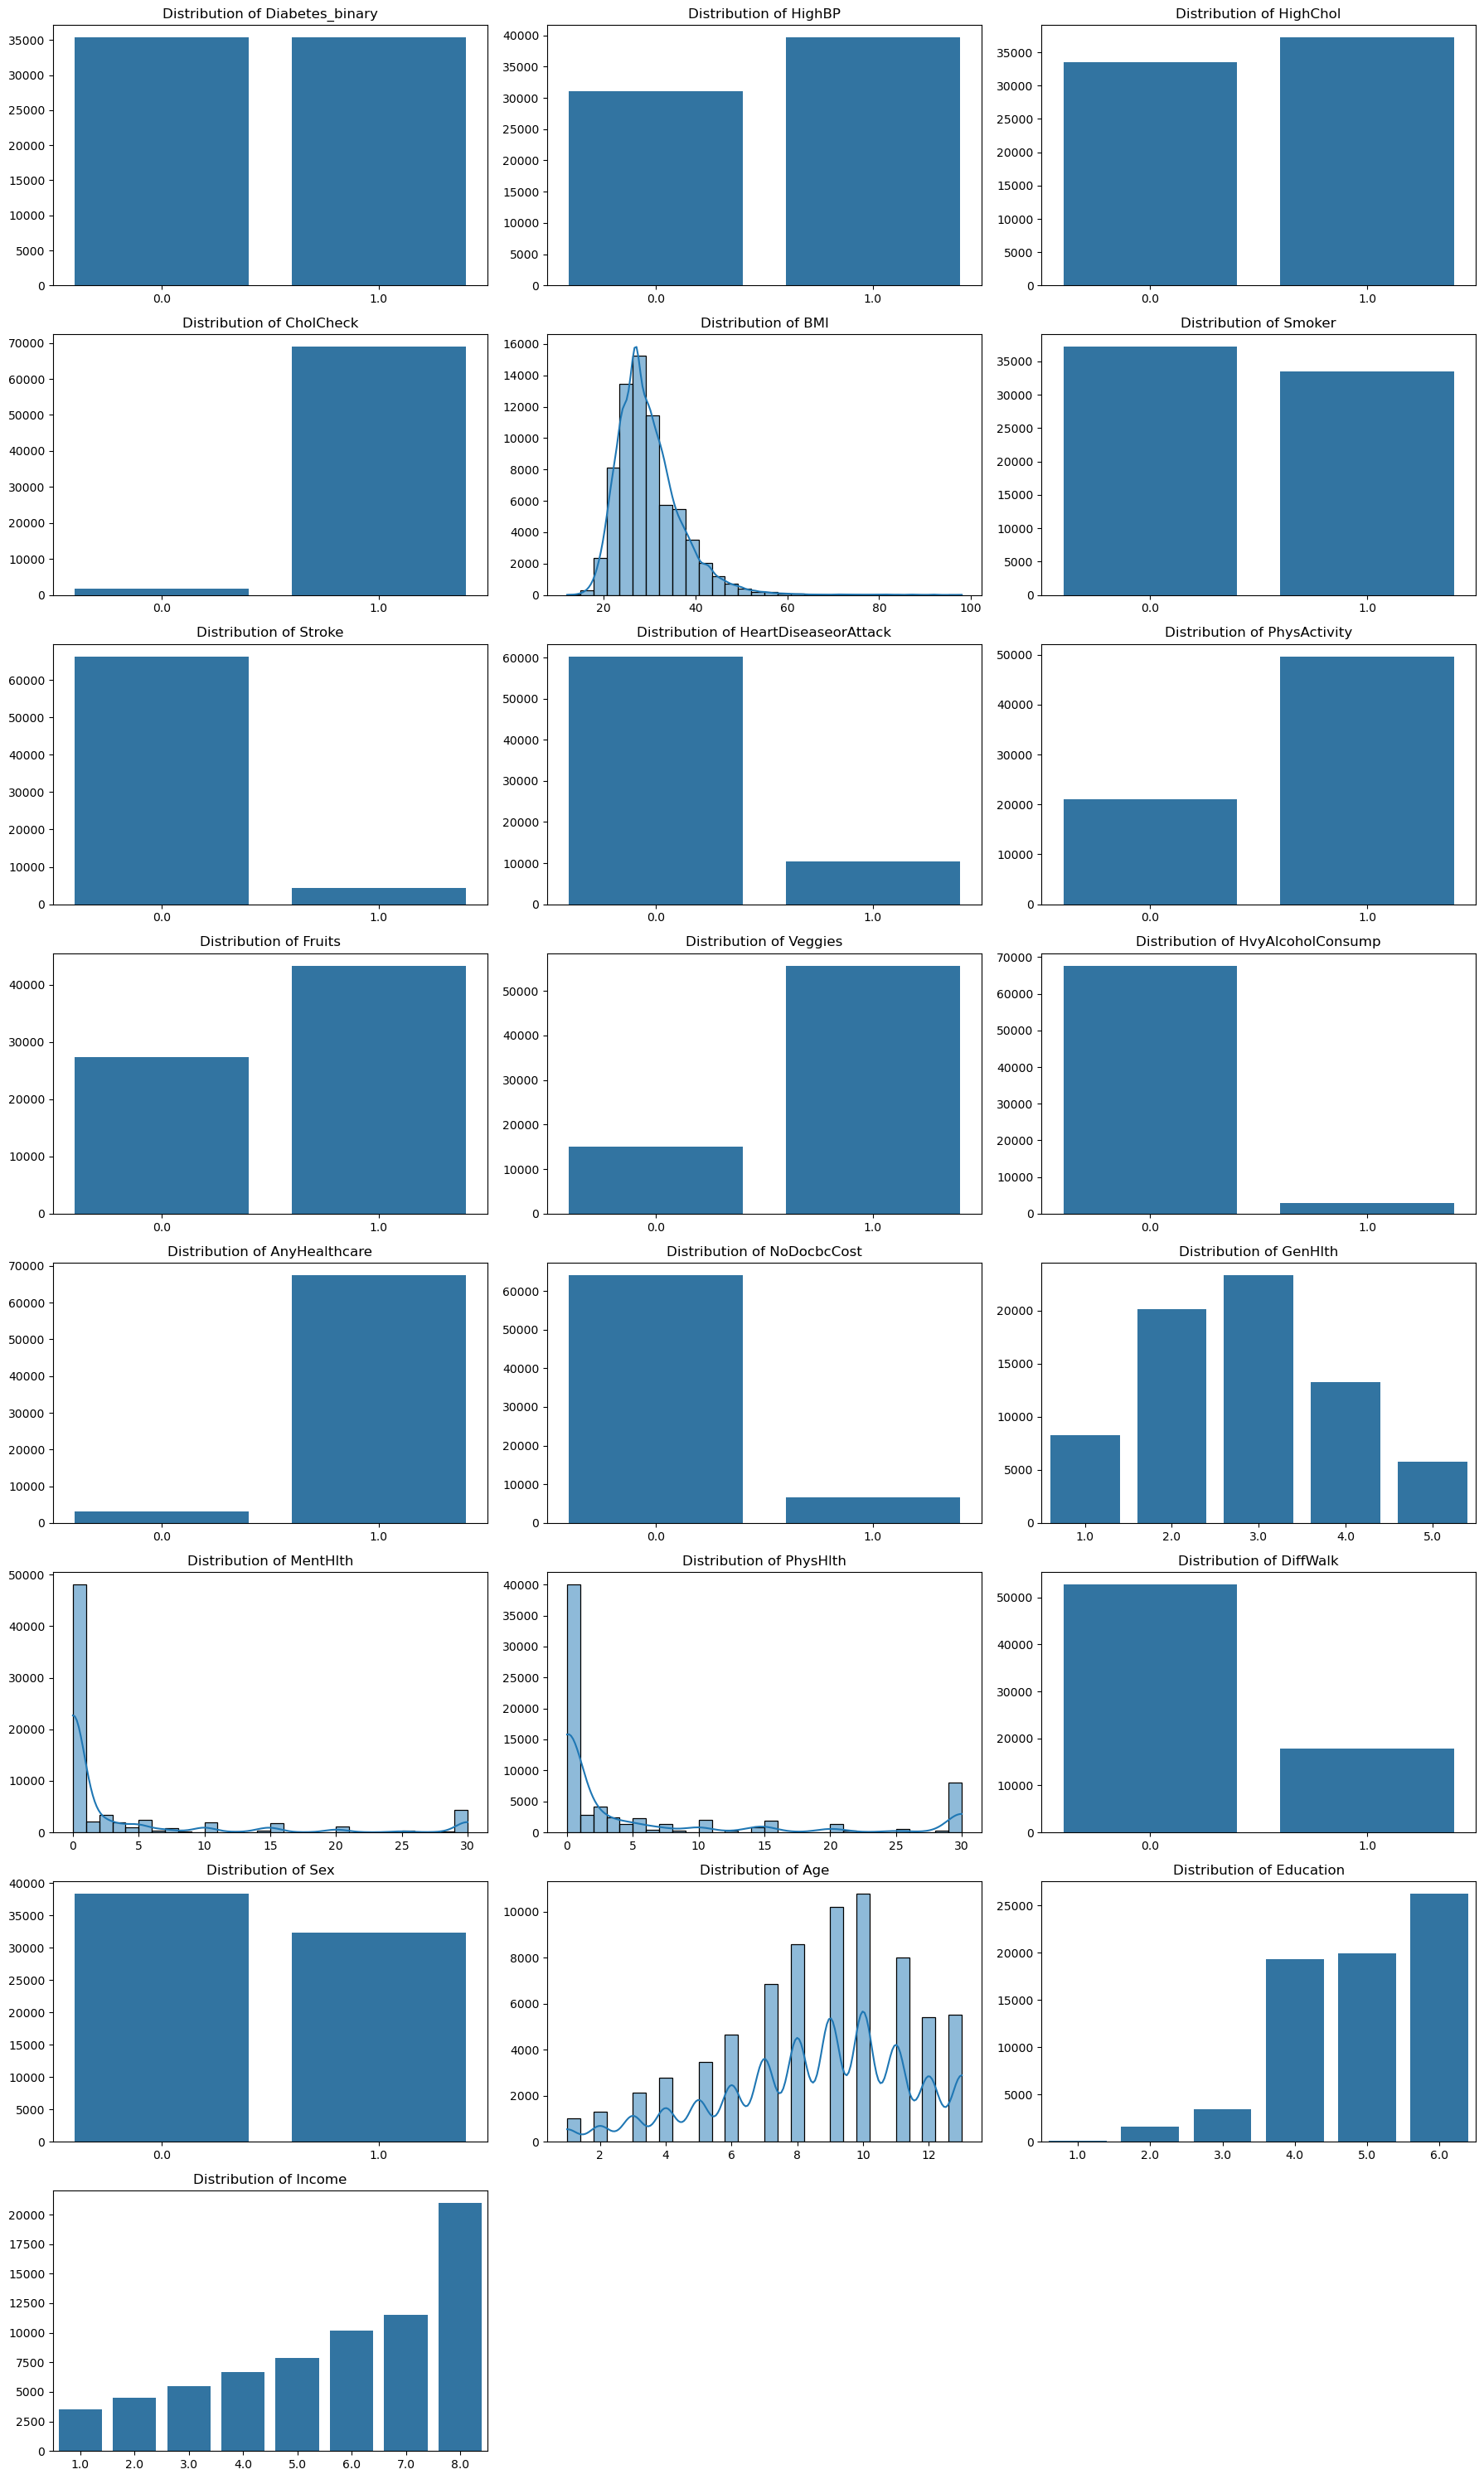

In [13]:
#Create a figure with subplots for each feature distribution
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(18, 30))
axes = axes.flatten()  # Flatten the array of axes

feature_count = 0

#Iterate over each column to plot
for i, col in enumerate(diabetes_data.columns):
    if diabetes_data[col].dtype == 'object' or len(diabetes_data[col].unique()) <= 10:
        #For categorical data or data with few unique values, use a countplot
        sns.countplot(x=diabetes_data[col], ax=axes[i])
    else:
        #For numerical data, use a histogram
        sns.histplot(diabetes_data[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    feature_count +=1
    
#Adjust layout
for j in range(feature_count, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

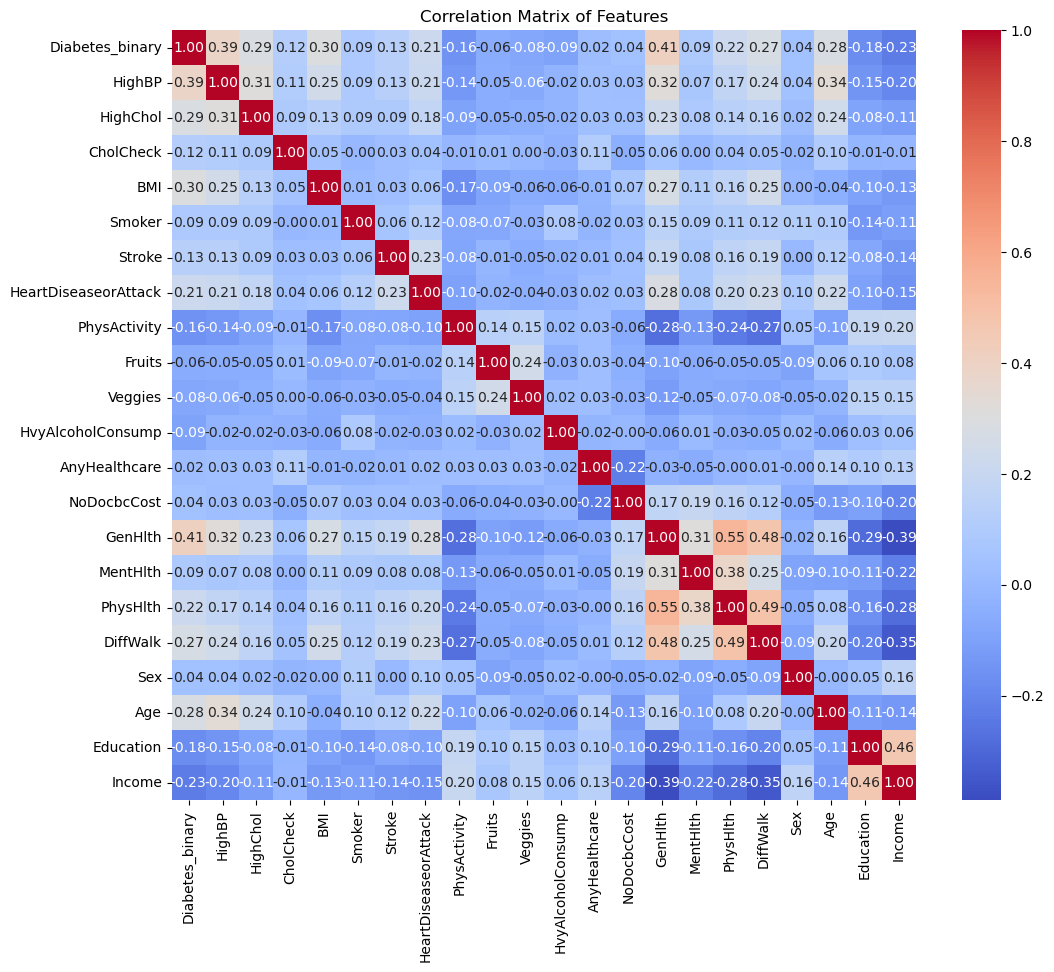

In [14]:
#Create a correlation matrix and plot it
corr_matrix = diabetes_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Machine Learning Models

# 1. Logistic Regression Model

## Using all features

Logistic Regression Model (All Features) Accuracy: 75.25%
Logistic Regression Model (All Features) ROC-AUC: 82.93%

Logistic Regression Classification Report (All Features):
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.75      7070
         1.0       0.74      0.77      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



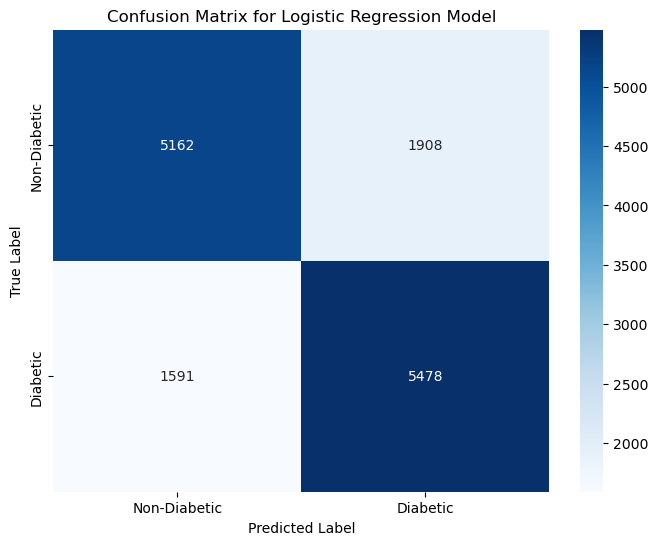

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

#Define features and target for logistic regression using all features
X_lr_all = diabetes_data.drop('Diabetes_binary', axis=1)
y_lr_all = diabetes_data['Diabetes_binary']

#Splitting the data into training and testing sets for the all features model
X_train_lr_all, X_test_lr_all, y_train_lr_all, y_test_lr_all = train_test_split(
    X_lr_all, y_lr_all, test_size=0.2, stratify=y_lr_all, random_state=42)

#Standardizing the features
scaler_lr_all = StandardScaler()
X_train_lr_all = scaler_lr_all.fit_transform(X_train_lr_all)
X_test_lr_all = scaler_lr_all.transform(X_test_lr_all)

#Initialize the Logistic Regression classifier for all features
lr_classifier_all = LogisticRegression(random_state=42, max_iter=1000)

#Train the classifier
lr_classifier_all.fit(X_train_lr_all, y_train_lr_all)

#Predictions
y_pred_lr_all = lr_classifier_all.predict(X_test_lr_all)

#Evaluation
accuracy_lr_all = accuracy_score(y_test_lr_all, y_pred_lr_all)
roc_auc_lr_all = roc_auc_score(y_test_lr_all, lr_classifier_all.predict_proba(X_test_lr_all)[:, 1])
report_lr_all = classification_report(y_test_lr_all, y_pred_lr_all)

#Print the performance metrics
print(f"Logistic Regression Model (All Features) Accuracy: {accuracy_lr_all:.2%}")
print(f"Logistic Regression Model (All Features) ROC-AUC: {roc_auc_lr_all:.2%}\n")
print("Logistic Regression Classification Report (All Features):")
print(report_lr_all)

#Confusion Matrix
conf_matrix_lr_all = confusion_matrix(y_test_lr_all, y_pred_lr_all)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_all, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Socio-Demographic Features

Logistic Regression Model (Socio-Demographic Features) Accuracy: 64.96%
Logistic Regression Model (Socio-Demographic Features) ROC-AUC: 70.46%

Logistic Regression Classification Report (Socio-Demographic Features):
              precision    recall  f1-score   support

         0.0       0.65      0.63      0.64      7070
         1.0       0.65      0.66      0.65      7069

    accuracy                           0.65     14139
   macro avg       0.65      0.65      0.65     14139
weighted avg       0.65      0.65      0.65     14139



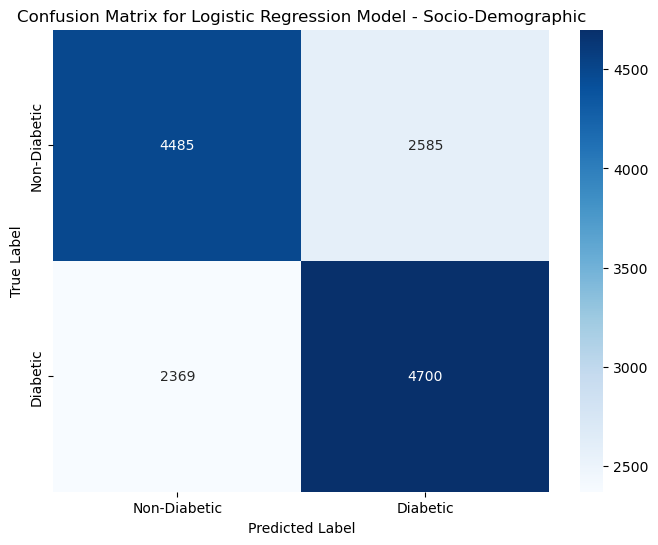

In [16]:
#Extract only socio-demographic features
socio_demo_features = ['Income', 'Education', 'Age', 'Sex', 'NoDocbcCost', 'AnyHealthcare']  # Add or remove features as needed

#Define features and target using only socio-demographic factors
X_lr_socio = diabetes_data[socio_demo_features]
y_lr_socio = diabetes_data['Diabetes_binary']

#Split the data into training and testing sets for socio-demographic features
X_train_lr_socio, X_test_lr_socio, y_train_lr_socio, y_test_lr_socio = train_test_split(
    X_lr_socio, y_lr_socio, test_size=0.2, stratify=y_lr_socio, random_state=42)

#Standardizing the features
scaler_lr_socio = StandardScaler()
X_train_lr_socio = scaler_lr_socio.fit_transform(X_train_lr_socio)
X_test_lr_socio = scaler_lr_socio.transform(X_test_lr_socio)

#Initialize the Logistic Regression classifier for socio-demographic features
lr_classifier_socio = LogisticRegression(random_state=42, max_iter=1000)

#Train the classifier
lr_classifier_socio.fit(X_train_lr_socio, y_train_lr_socio)

#Predictions
y_pred_lr_socio = lr_classifier_socio.predict(X_test_lr_socio)

#Evaluation
accuracy_lr_socio = accuracy_score(y_test_lr_socio, y_pred_lr_socio)
roc_auc_lr_socio = roc_auc_score(y_test_lr_socio, lr_classifier_socio.predict_proba(X_test_lr_socio)[:, 1])
report_lr_socio = classification_report(y_test_lr_socio, y_pred_lr_socio)

#Print the performance metrics
print(f"Logistic Regression Model (Socio-Demographic Features) Accuracy: {accuracy_lr_socio:.2%}")
print(f"Logistic Regression Model (Socio-Demographic Features) ROC-AUC: {roc_auc_lr_socio:.2%}\n")
print("Logistic Regression Classification Report (Socio-Demographic Features):")
print(report_lr_socio)

#Confusion Matrix
conf_matrix_lr_socio = confusion_matrix(y_test_lr_socio, y_pred_lr_socio)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_socio, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Logistic Regression Model - Socio-Demographic')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Combined Feature Set

In [17]:
#Feature Importance from coefficients
feature_importance_lr_all = abs(lr_classifier_all.coef_[0])
features_lr_all = X_lr_all.columns
feature_importance_df_lr_all = pd.DataFrame({'Feature': features_lr_all, 'Importance': feature_importance_lr_all})
feature_importance_df_lr_all.sort_values(by='Importance', ascending=False, inplace=True)

#Display feature importances
print("Feature Importances from Logistic Regression (All Features):")
print(feature_importance_df_lr_all)


Feature Importances from Logistic Regression (All Features):
                 Feature  Importance
13               GenHlth    0.647402
3                    BMI    0.551885
18                   Age    0.426829
0                 HighBP    0.378030
1               HighChol    0.287215
2              CholCheck    0.214902
10     HvyAlcoholConsump    0.154260
20                Income    0.149959
17                   Sex    0.135445
6   HeartDiseaseorAttack    0.087571
15              PhysHlth    0.053712
19             Education    0.040548
5                 Stroke    0.040470
14              MentHlth    0.038742
16              DiffWalk    0.028182
8                 Fruits    0.018193
4                 Smoker    0.014602
9                Veggies    0.008613
11         AnyHealthcare    0.006894
7           PhysActivity    0.006868
12           NoDocbcCost    0.003846


Logistic Regression Model (Combined Features) Accuracy: 75.25%
Logistic Regression Model (Combined Features) ROC-AUC: 82.87%

Logistic Regression Classification Report (Combined Features):
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.75      7070
         1.0       0.74      0.78      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



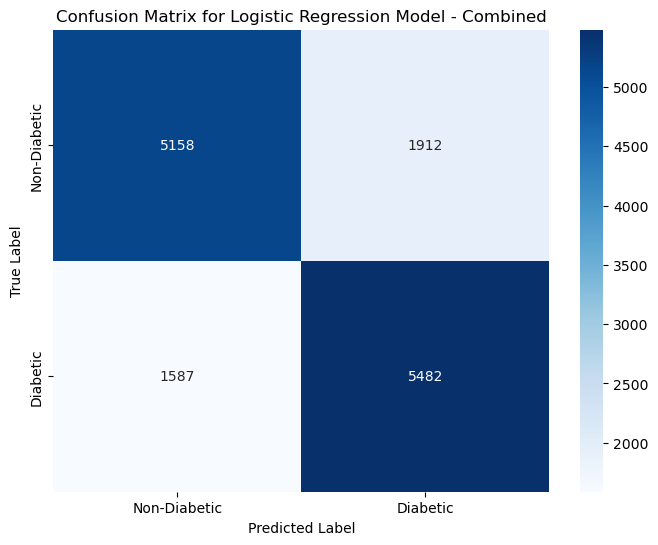

In [18]:
#Selecting combined features based on feature importance 
combined_features_lr = feature_importance_df_lr_all.head(10)['Feature'].tolist()

#Define features and target for the logistic regression model using combined features
X_lr_combined = diabetes_data[combined_features_lr]
y_lr_combined = diabetes_data['Diabetes_binary']

#Splitting the data into training and testing sets for combined features
X_train_lr_combined, X_test_lr_combined, y_train_lr_combined, y_test_lr_combined = train_test_split(
    X_lr_combined, y_lr_combined, test_size=0.2, stratify=y_lr_combined, random_state=42)

#Standardizing the features
scaler_lr_combined = StandardScaler()
X_train_lr_combined = scaler_lr_combined.fit_transform(X_train_lr_combined)
X_test_lr_combined = scaler_lr_combined.transform(X_test_lr_combined)

#Initialize the Logistic Regression classifier for combined features
lr_classifier_combined = LogisticRegression(random_state=42, max_iter=1000)

#Train the classifier
lr_classifier_combined.fit(X_train_lr_combined, y_train_lr_combined)

#Predictions
y_pred_lr_combined = lr_classifier_combined.predict(X_test_lr_combined)

#Evaluation
accuracy_lr_combined = accuracy_score(y_test_lr_combined, y_pred_lr_combined)
roc_auc_lr_combined = roc_auc_score(y_test_lr_combined, lr_classifier_combined.predict_proba(X_test_lr_combined)[:, 1])
report_lr_combined = classification_report(y_test_lr_combined, y_pred_lr_combined)

#Print the performance metrics
print(f"Logistic Regression Model (Combined Features) Accuracy: {accuracy_lr_combined:.2%}")
print(f"Logistic Regression Model (Combined Features) ROC-AUC: {roc_auc_lr_combined:.2%}\n")
print("Logistic Regression Classification Report (Combined Features):")
print(report_lr_combined)

#Confusion Matrix
conf_matrix_lr_combined = confusion_matrix(y_test_lr_combined, y_pred_lr_combined)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_combined, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Logistic Regression Model - Combined')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Support Vector Machine Model

## Using all features

SVM Model (All Features) Accuracy: 75.32%
SVM Classification Report (All Features):
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7070
         1.0       0.73      0.81      0.77      7069

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



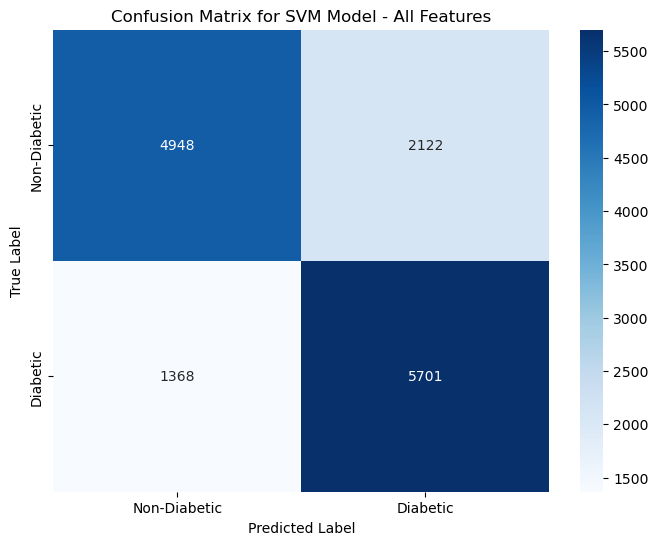

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

#Define features and target for the SVM model using all features
X_svm_all = diabetes_data.drop('Diabetes_binary', axis=1)
y_svm_all = diabetes_data['Diabetes_binary']

#Splitting the data into training and testing sets for the all features model
X_train_svm_all, X_test_svm_all, y_train_svm_all, y_test_svm_all = train_test_split(
    X_svm_all, y_svm_all, test_size=0.2, stratify=y_svm_all, random_state=42)

#Standardizing the features
scaler_all = StandardScaler()
X_train_svm_all = scaler_all.fit_transform(X_train_svm_all)
X_test_svm_all = scaler_all.transform(X_test_svm_all)

#Initialize the SVM classifier for all features
svm_classifier_all = SVC(kernel = 'rbf')

#Train the classifier
svm_classifier_all.fit(X_train_svm_all, y_train_svm_all)

#Predictions
y_pred_svm_all = svm_classifier_all.predict(X_test_svm_all)

#Evaluation
accuracy_svm_all = accuracy_score(y_test_svm_all, y_pred_svm_all)
report_svm_all = classification_report(y_test_svm_all, y_pred_svm_all)

#Print the performance metrics
print(f"SVM Model (All Features) Accuracy: {accuracy_svm_all:.2%}")
print("SVM Classification Report (All Features):")
print(report_svm_all)

#Confusion Matrix
conf_matrix_svm_all = confusion_matrix(y_test_svm_all, y_pred_svm_all)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_all, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for SVM Model - All Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Socio-Demographic Features

SVM Model (Socio-Demographic Features) Accuracy: 65.68%
SVM Classification Report (Socio-Demographic Features):
              precision    recall  f1-score   support

         0.0       0.69      0.57      0.62      7070
         1.0       0.63      0.74      0.68      7069

    accuracy                           0.66     14139
   macro avg       0.66      0.66      0.65     14139
weighted avg       0.66      0.66      0.65     14139



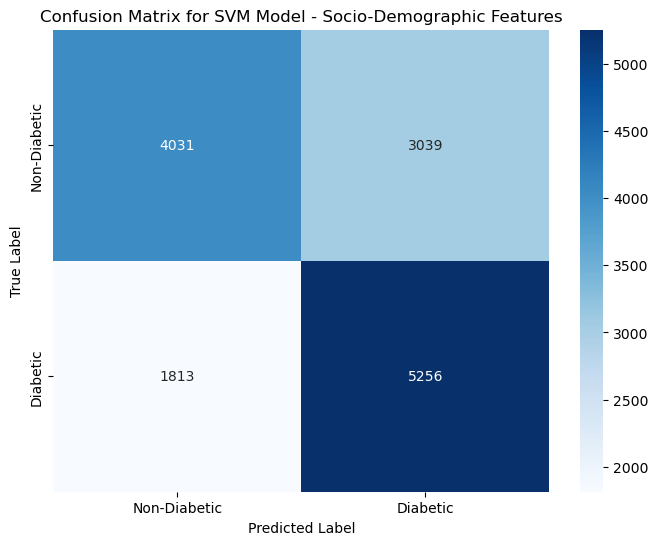

In [20]:
#Extract socio-demographic features
socio_demo_features = ['Income', 'Education', 'Age', 'Sex', 'NoDocbcCost', 'AnyHealthcare']  # Add or remove features as needed

#Define features and target for the SVM model using socio-demographic features
X_svm_socio = diabetes_data[socio_demo_features]
y_svm_socio = diabetes_data['Diabetes_binary']

#Splitting the data into training and testing sets for socio-demographic features
X_train_svm_socio, X_test_svm_socio, y_train_svm_socio, y_test_svm_socio = train_test_split(
    X_svm_socio, y_svm_socio, test_size=0.2, stratify=y_svm_socio, random_state=42)

#Standardizing the features
scaler_socio = StandardScaler()
X_train_svm_socio = scaler_socio.fit_transform(X_train_svm_socio)
X_test_svm_socio = scaler_socio.transform(X_test_svm_socio)

#Initialize the SVM classifier for socio-demographic features
svm_classifier_socio = SVC(kernel = 'rbf')

#Train the classifier
svm_classifier_socio.fit(X_train_svm_socio, y_train_svm_socio)

#Predictions
y_pred_svm_socio = svm_classifier_socio.predict(X_test_svm_socio)

#Evaluation
accuracy_svm_socio = accuracy_score(y_test_svm_socio, y_pred_svm_socio)
report_svm_socio = classification_report(y_test_svm_socio, y_pred_svm_socio)

#Print the performance metrics
print(f"SVM Model (Socio-Demographic Features) Accuracy: {accuracy_svm_socio:.2%}")
print("SVM Classification Report (Socio-Demographic Features):")
print(report_svm_socio)

#Confusion Matrix
conf_matrix_svm_socio = confusion_matrix(y_test_svm_socio, y_pred_svm_socio)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_socio, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for SVM Model - Socio-Demographic Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Combined Feature Set

SVM Model (Combined Features) Accuracy: 74.55%
SVM Classification Report (Combined Features):
              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      7070
         1.0       0.72      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.74     14139
weighted avg       0.75      0.75      0.74     14139



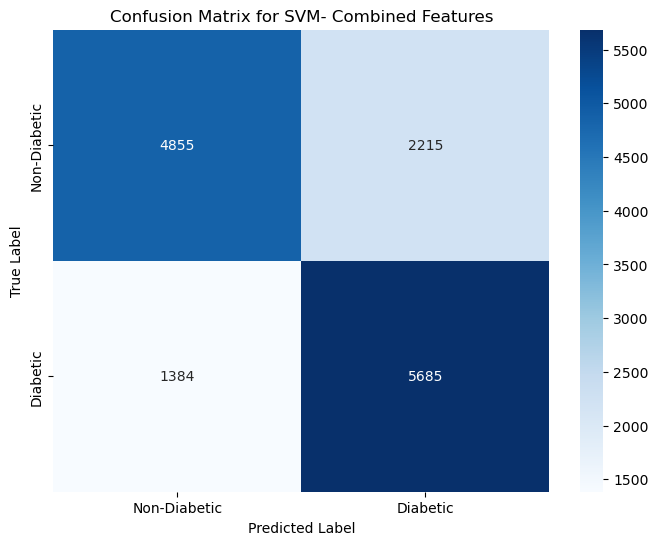

In [21]:
combined_features_svm = [
    'GenHlth',      #health indicator
    'BMI',          #health indicator
    'Income',       #Socio-demographic factor
    'Age',          #Socio-demographic factor
    'PhysHlth',     #health indicator
    'Education',    #Socio-demographic factor
    'HighBP',       #health indicator
    'MentHlth',     #health indicator
    'DiffWalk'      #health indicator
]

#Define features and target for the SVM model using combined features
X_svm_combined = diabetes_data[combined_features_svm]
y_svm_combined = diabetes_data['Diabetes_binary']

#Splitting the data into training and testing sets for combined features
X_train_svm_combined, X_test_svm_combined, y_train_svm_combined, y_test_svm_combined = train_test_split(
    X_svm_combined, y_svm_combined, test_size=0.2, stratify=y_svm_combined, random_state=42)

#Standardizing the features
scaler_combined = StandardScaler()
X_train_svm_combined = scaler_combined.fit_transform(X_train_svm_combined)
X_test_svm_combined = scaler_combined.transform(X_test_svm_combined)

#Initialize the SVM classifier for combined features
svm_classifier_combined = SVC(kernel = 'rbf')

#Train the classifier
svm_classifier_combined.fit(X_train_svm_combined, y_train_svm_combined)

#Predictions
y_pred_svm_combined = svm_classifier_combined.predict(X_test_svm_combined)

#Evaluation
accuracy_svm_combined = accuracy_score(y_test_svm_combined, y_pred_svm_combined)
report_svm_combined = classification_report(y_test_svm_combined, y_pred_svm_combined)

#Print the performance metrics
print(f"SVM Model (Combined Features) Accuracy: {accuracy_svm_combined:.2%}")
print("SVM Classification Report (Combined Features):")
print(report_svm_combined)

#Confusion Matrix
conf_matrix_svm_combined = confusion_matrix(y_test_svm_combined, y_pred_svm_combined)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for SVM- Combined Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3. Naive Bayes Model

## Using all Features

Naive Bayes Model Accuracy: 71.56%
Classification Report for Naive Bayes Model:
              precision    recall  f1-score   support

         0.0       0.70      0.75      0.72      6979
         1.0       0.74      0.68      0.71      7160

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



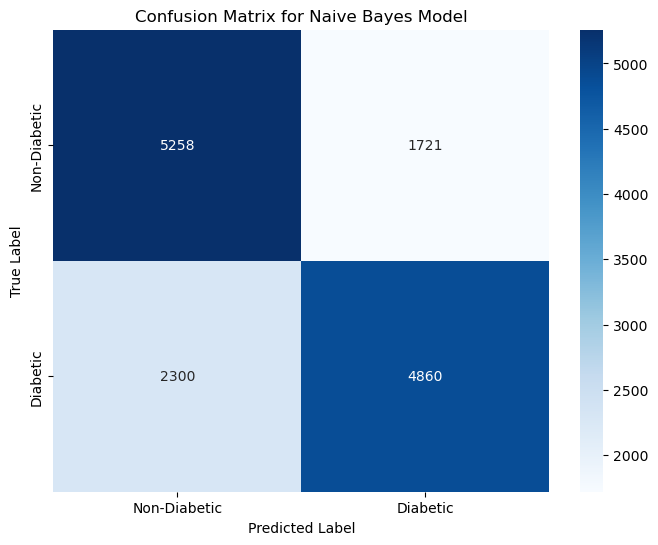

In [22]:
#Feature selection and target variable separation
X_nb = diabetes_data.drop(['Diabetes_binary', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump'], axis=1)
Y_nb = diabetes_data['Diabetes_binary']

#Splitting the dataset into training and testing sets
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, Y_nb, test_size=0.2, random_state=42)

#Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_nb, y_train_nb)

#Predictions
y_pred_nb = nb_classifier.predict(X_test_nb)

#Accuracy and other metrics
accuracy_nb = metrics.accuracy_score(y_test_nb, y_pred_nb)
conf_matrix_nb = metrics.confusion_matrix(y_test_nb, y_pred_nb)
classification_report_nb = metrics.classification_report(y_test_nb, y_pred_nb)

#Printing performance metrics
print(f"Naive Bayes Model Accuracy: {accuracy_nb:.2%}")
print("Classification Report for Naive Bayes Model:")
print(classification_report_nb)

#Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Naive Bayes Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Socio-Demographic Features

Naive Bayes Model (Socio-Demographic Features) Accuracy: 64.41%
Classification Report for Naive Bayes Model (Socio-Demographic Features):
              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65      7070
         1.0       0.65      0.62      0.63      7069

    accuracy                           0.64     14139
   macro avg       0.64      0.64      0.64     14139
weighted avg       0.64      0.64      0.64     14139



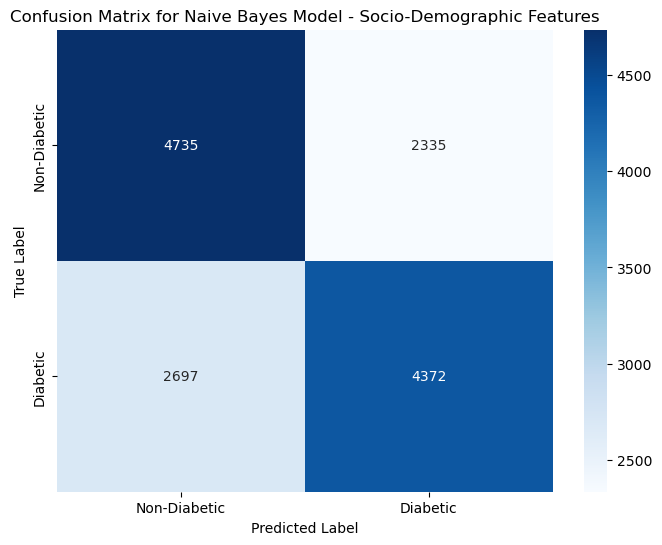

In [23]:
#Extract only socio-demographic features
socio_demo_features = ['Income', 'Education', 'Age', 'Sex', 'NoDocbcCost', 'AnyHealthcare']  # Add or remove features as needed

#Define features and target using only socio-demographic factors
X_nb_socio = diabetes_data[socio_demo_features]
Y_nb_socio = diabetes_data['Diabetes_binary']

#Splitting the data into training and testing sets for socio-demographic features
X_train_nb_socio, X_test_nb_socio, y_train_nb_socio, y_test_nb_socio = train_test_split(
    X_nb_socio, Y_nb_socio, test_size=0.2, stratify=Y_nb_socio, random_state=42)

#Initialize the Gaussian Naive Bayes classifier
nb_classifier_socio = GaussianNB()
nb_classifier_socio.fit(X_train_nb_socio, y_train_nb_socio)

#Predictions
y_pred_nb_socio = nb_classifier_socio.predict(X_test_nb_socio)

#Evaluation
accuracy_nb_socio = metrics.accuracy_score(y_test_nb_socio, y_pred_nb_socio)
conf_matrix_nb_socio = metrics.confusion_matrix(y_test_nb_socio, y_pred_nb_socio)
classification_report_nb_socio = metrics.classification_report(y_test_nb_socio, y_pred_nb_socio)

#Print the performance metrics
print(f"Naive Bayes Model (Socio-Demographic Features) Accuracy: {accuracy_nb_socio:.2%}")
print("Classification Report for Naive Bayes Model (Socio-Demographic Features):")
print(classification_report_nb_socio)

#Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_socio, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Naive Bayes Model - Socio-Demographic Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Combined Feature Set

In [24]:
from sklearn.inspection import permutation_importance

#Perform permutation importance
results = permutation_importance(nb_classifier, X_test_nb, y_test_nb, scoring='accuracy', n_repeats=10, random_state=42, n_jobs=-1)

#Get the importances
importances = results.importances_mean

#Combine with feature names
feature_importance_df_nb = pd.DataFrame({'Feature': X_test_nb.columns, 'Importance': importances})

#Sort by importance
feature_importance_df_nb.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df_nb)

                 Feature  Importance
0                 HighBP    0.016154
6   HeartDiseaseorAttack    0.015022
3                    BMI    0.014838
5                 Stroke    0.012625
14                   Age    0.011012
9                GenHlth    0.010892
1               HighChol    0.006875
2              CholCheck    0.006726
7          AnyHealthcare    0.000870
13                   Sex    0.000601
12              DiffWalk    0.000488
15             Education    0.000106
8            NoDocbcCost   -0.000198
4                 Smoker   -0.000304
16                Income   -0.000573
11              PhysHlth   -0.000736
10              MentHlth   -0.002376


Naive Bayes Model Accuracy for Combined Features: 74.20%
Classification Report for Naive Bayes Model (Combined Features):
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73      6979
         1.0       0.73      0.77      0.75      7160

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



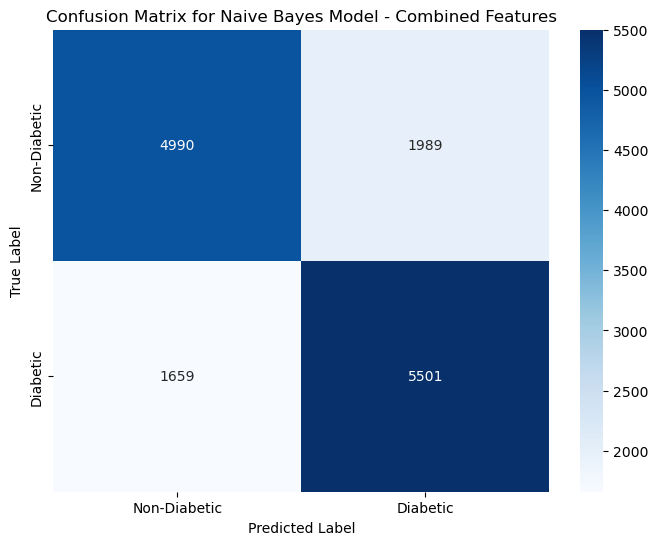

In [25]:
nb_combined_features = feature_importance_df_nb.head(8)['Feature'].tolist()
X_nb_combined = diabetes_data[nb_combined_features]
Y_nb_combined = diabetes_data['Diabetes_binary']
X_train_nb_combined, X_test_nb_combined, y_train_nb_combined, y_test_nb_combined = train_test_split(X_nb_combined, Y_nb_combined, test_size=0.2, random_state=42)

#Training and fitting the model
nv = GaussianNB() 
nv.fit(X_train_nb_combined,y_train_nb_combined)

#Predictions
y_pred_nb_combined = nv.predict(X_test_nb_combined)

#Evaluation
accuracy_nb_combined = metrics.accuracy_score(y_test_nb_combined, y_pred_nb_combined)
conf_matrix_nb_combined = metrics.confusion_matrix(y_test_nb_combined, y_pred_nb_combined)
classification_report_nb_combined = metrics.classification_report(y_test_nb_combined, y_pred_nb_combined)

#Print the performance metrics
print(f"Naive Bayes Model Accuracy for Combined Features: {accuracy_nb_combined:.2%}")
print("Classification Report for Naive Bayes Model (Combined Features):")
print(classification_report_nb_combined)

#Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_combined, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Naive Bayes Model - Combined Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. XGBoost Model

## Using all features

XGBoost Model (All Features) Accuracy: 75.20%
Classification Report for XGBoost Model (All Features):
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      6979
         1.0       0.74      0.79      0.76      7160

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



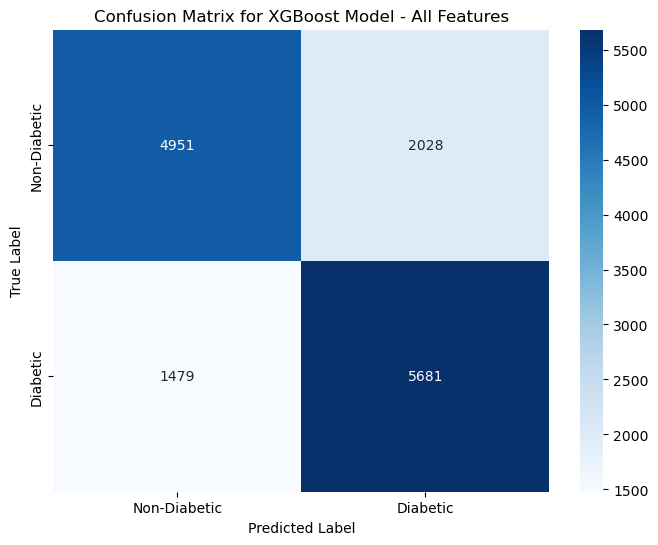

In [26]:
import xgboost as xgb

#Define features and target
X_xgb_all = diabetes_data.drop(['Diabetes_binary', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump'], axis=1)
Y_xgb_all = diabetes_data['Diabetes_binary']

#Splitting the dataset into training and testing sets
X_train_xgb_all, X_test_xgb_all, y_train_xgb_all, y_test_xgb_all = train_test_split(X_xgb_all, Y_xgb_all, test_size=0.2, random_state=42)

#Initialize the XGBoost classifier
xgb_classifier_all = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier_all.fit(X_train_xgb_all, y_train_xgb_all)

#Predictions
y_pred_xgb_all = xgb_classifier_all.predict(X_test_xgb_all)

#Evaluation
accuracy_xgb_all = accuracy_score(y_test_xgb_all, y_pred_xgb_all)
conf_matrix_xgb_all = confusion_matrix(y_test_xgb_all, y_pred_xgb_all)
classification_report_xgb_all = classification_report(y_test_xgb_all, y_pred_xgb_all)

#Print the performance metrics
print(f"XGBoost Model (All Features) Accuracy: {accuracy_xgb_all:.2%}")
print("Classification Report for XGBoost Model (All Features):")
print(classification_report_xgb_all)

#Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_all, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for XGBoost Model - All Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Socio-Demographic Features

XGBoost Model (Socio-Demographic Features) Accuracy: 65.12%
Classification Report for XGBoost Model (Socio-Demographic Features):
              precision    recall  f1-score   support

         0.0       0.66      0.60      0.63      6979
         1.0       0.64      0.70      0.67      7160

    accuracy                           0.65     14139
   macro avg       0.65      0.65      0.65     14139
weighted avg       0.65      0.65      0.65     14139



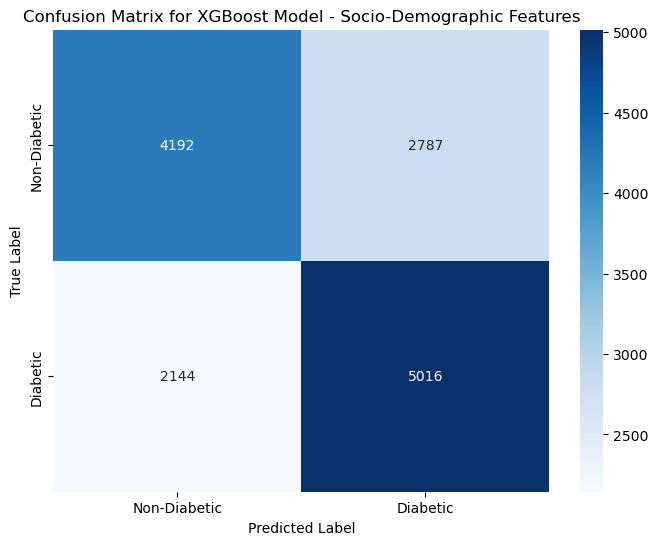

In [27]:
#Extract only socio-demographic features
socio_demo_features = ['Income', 'Education', 'Age', 'Sex', 'NoDocbcCost', 'AnyHealthcare']  # Add or remove features as needed

#Feature selection for socio-demographic features
X_xgb_socio = diabetes_data[socio_demo_features]
Y_xgb_socio = diabetes_data['Diabetes_binary']

#Splitting the dataset into training and testing sets
X_train_xgb_socio, X_test_xgb_socio, y_train_xgb_socio, y_test_xgb_socio = train_test_split(X_xgb_socio, Y_xgb_socio, test_size=0.2, random_state=42)

#Initialize the XGBoost classifier
xgb_classifier_socio = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier_socio.fit(X_train_xgb_socio, y_train_xgb_socio)

#Predictions
y_pred_xgb_socio = xgb_classifier_socio.predict(X_test_xgb_socio)

#Evaluation
accuracy_xgb_socio = accuracy_score(y_test_xgb_socio, y_pred_xgb_socio)
conf_matrix_xgb_socio = confusion_matrix(y_test_xgb_socio, y_pred_xgb_socio)
classification_report_xgb_socio = classification_report(y_test_xgb_socio, y_pred_xgb_socio)

#Print the performance metrics
print(f"XGBoost Model (Socio-Demographic Features) Accuracy: {accuracy_xgb_socio:.2%}")
print("Classification Report for XGBoost Model (Socio-Demographic Features):")
print(classification_report_xgb_socio)

#Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_socio, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for XGBoost Model - Socio-Demographic Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Combined Feature Set

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

#Extract feature importances
importances = xgb_classifier_all.feature_importances_
features = X_train_xgb_all.columns

#Create a DataFrame to hold the feature names and their corresponding importance values
feature_importance_df_xgb = pd.DataFrame({'Feature': features, 'Importance': importances})

#Sort the DataFrame by the importance of the features in descending order
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)
print(feature_importance_df_xgb)

                 Feature  Importance
0                 HighBP    0.540110
9                GenHlth    0.134888
1               HighChol    0.063518
2              CholCheck    0.053420
14                   Age    0.035404
6   HeartDiseaseorAttack    0.029129
3                    BMI    0.026196
13                   Sex    0.017258
12              DiffWalk    0.015138
5                 Stroke    0.013872
16                Income    0.013625
15             Education    0.010444
7          AnyHealthcare    0.009957
8            NoDocbcCost    0.009734
10              MentHlth    0.009197
4                 Smoker    0.009082
11              PhysHlth    0.009030


XGBoost Model Accuracy for Combined Features: 75.37%
Classification Report for XGBoost Model for Combined Features:
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      6979
         1.0       0.74      0.80      0.77      7160

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



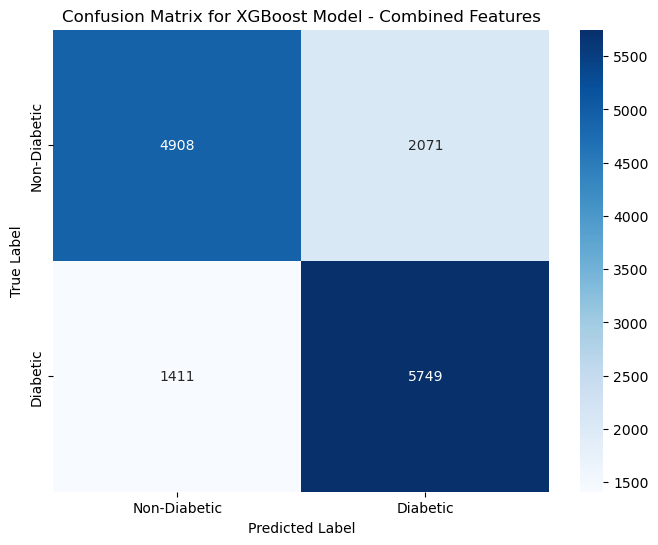

In [29]:
xgb_combined_features = feature_importance_df_xgb.head(10)['Feature'].tolist()
X_xgb_combined = diabetes_data[xgb_combined_features]
Y_xgb_combined = diabetes_data['Diabetes_binary']
X_train_xgb_combined, X_test_xgb_combined, y_train_xgb_combined, y_test_xgb_combined = train_test_split(X_xgb_combined, Y_xgb_combined, test_size=0.2, random_state=42)

xgb_classifier_xgb_combined = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier_xgb_combined.fit(X_train_xgb_combined, y_train_xgb_combined)

y_pred_xgb_combined = xgb_classifier_xgb_combined.predict(X_test_xgb_combined)
accuracy_xgb_combined = accuracy_score(y_test_xgb_combined, y_pred_xgb_combined)
conf_matrix_xgb_combined = confusion_matrix(y_test_xgb_combined, y_pred_xgb_combined)

print(f"XGBoost Model Accuracy for Combined Features: {accuracy_xgb_combined:.2%}")
print("Classification Report for XGBoost Model for Combined Features:")
print(classification_report(y_test_xgb_combined, y_pred_xgb_combined))

#Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_combined, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for XGBoost Model - Combined Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5. Decision Tree Model

## Using all features

Decision Tree Model Accuracy: 65.64%
Decision Tree Model ROC-AUC: 65.61%

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.66      7070
         1.0       0.66      0.65      0.65      7069

    accuracy                           0.66     14139
   macro avg       0.66      0.66      0.66     14139
weighted avg       0.66      0.66      0.66     14139



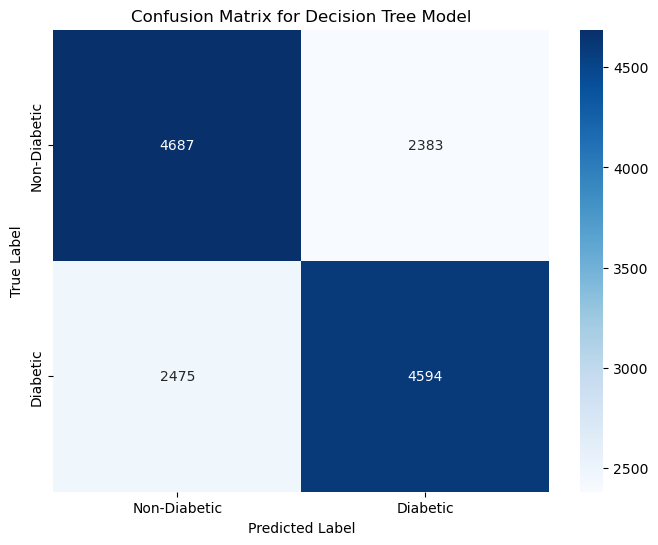

In [30]:
#Define features and target
X_dt = diabetes_data.drop('Diabetes_binary', axis=1)
y_dt = diabetes_data['Diabetes_binary']

#Splitting the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, stratify=y_dt, random_state=42)

#Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

#Train the classifier
dt_classifier.fit(X_train_dt, y_train_dt)

#Predictions
y_pred_dt = dt_classifier.predict(X_test_dt)

#Evaluation
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test_dt, dt_classifier.predict_proba(X_test_dt)[:, 1])
report_dt = classification_report(y_test_dt, y_pred_dt)

#Print the performance metrics
print(f"Decision Tree Model Accuracy: {accuracy_dt:.2%}")
print(f"Decision Tree Model ROC-AUC: {roc_auc_dt:.2%}\n")
print("Decision Tree Classification Report:")
print(report_dt)

#Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test_dt, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Socio-Demographic Features

Socio-Demographic Model Accuracy: 64.38%
Socio-Demographic Model ROC-AUC: 69.40%

Socio-Demographic Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.59      0.62      7070
         1.0       0.63      0.69      0.66      7069

    accuracy                           0.64     14139
   macro avg       0.65      0.64      0.64     14139
weighted avg       0.65      0.64      0.64     14139



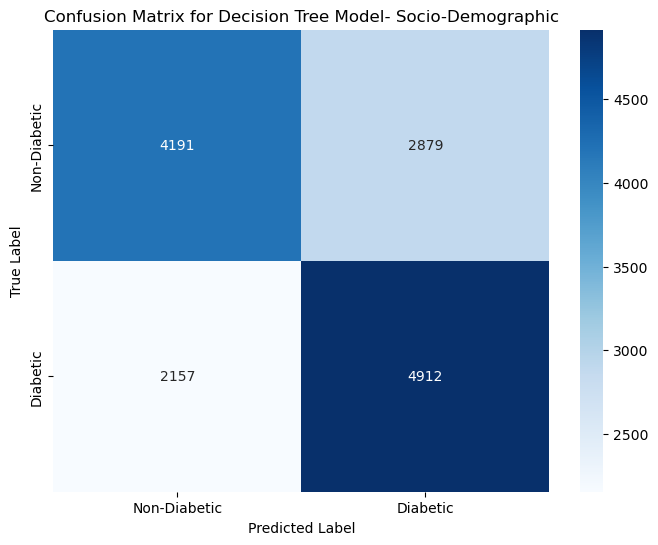

In [31]:
#Extract only the soci-demographic features
socio_demo_features = ['Income', 'Education', 'Age', 'Sex', 'NoDocbcCost', 'AnyHealthcare']  # Add or remove features as needed

#Define features and target using socio-demographic factors
X_train_socio, X_test_socio, y_train_socio, y_test_socio = train_test_split(
    diabetes_data[socio_demo_features], y_dt, test_size=0.2, stratify=y_dt, random_state=42)

#Initialize and train the Decision Tree classifier
dt_classifier_socio = DecisionTreeClassifier(random_state=42)
dt_classifier_socio.fit(X_train_socio, y_train_socio)

#Make predictions
y_pred_socio = dt_classifier_socio.predict(X_test_socio)

#Evaluate the model
accuracy_socio = accuracy_score(y_test_socio, y_pred_socio)
roc_auc_socio = roc_auc_score(y_test_socio, dt_classifier_socio.predict_proba(X_test_socio)[:, 1])
report_socio = classification_report(y_test_socio, y_pred_socio)

#Print the performance metrics
print(f"Socio-Demographic Model Accuracy: {accuracy_socio:.2%}")
print(f"Socio-Demographic Model ROC-AUC: {roc_auc_socio:.2%}\n")
print("Socio-Demographic Classification Report:")
print(report_socio)

#Confusion Matrix
conf_matrix_socio = confusion_matrix(y_test_socio, y_pred_socio)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_socio, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Decision Tree Model- Socio-Demographic')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Combined Feature Set

In [32]:
feature_importances = dt_classifier.feature_importances_
features = X_train_dt.columns

#Create a DataFrame to hold feature importances
feature_importance_df_dt = pd.DataFrame({'feature': features, 'importance': feature_importances})

#Sort the DataFrame by importance
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='importance', ascending=False)

#Display the feature importances
print("Feature Importances:")
print(feature_importance_df_dt)

Feature Importances:
                 feature  importance
0                 HighBP    0.152375
3                    BMI    0.131249
13               GenHlth    0.103908
18                   Age    0.100216
20                Income    0.086481
15              PhysHlth    0.067982
19             Education    0.059930
14              MentHlth    0.056399
4                 Smoker    0.030583
8                 Fruits    0.029841
7           PhysActivity    0.027300
17                   Sex    0.025180
9                Veggies    0.023946
1               HighChol    0.021266
16              DiffWalk    0.020169
6   HeartDiseaseorAttack    0.017153
12           NoDocbcCost    0.012293
5                 Stroke    0.010212
10     HvyAlcoholConsump    0.009935
11         AnyHealthcare    0.008528
2              CholCheck    0.005054


Combined Feature Set Decision Tree Model Accuracy: 65.68%
Combined Feature Set Decision Tree Model ROC-AUC: 65.88%

Combined Feature Set Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66      7070
         1.0       0.66      0.64      0.65      7069

    accuracy                           0.66     14139
   macro avg       0.66      0.66      0.66     14139
weighted avg       0.66      0.66      0.66     14139



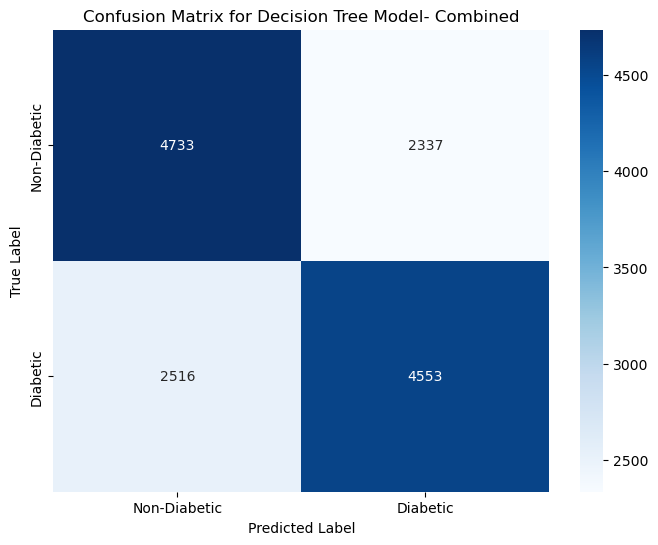

In [33]:
#Selecting combined features based on feature importance 
combined_features_dt = feature_importance_df_dt.head(10)['feature'].tolist()

X_train_combined_dt, X_test_combined_dt, y_train_combined_dt, y_test_combined_dt = train_test_split(
    diabetes_data[combined_features_dt], y_dt, test_size=0.2, stratify=y_dt, random_state=42)

#Initialize and train the Decision Tree classifier
dt_classifier_combined = DecisionTreeClassifier(random_state=42)
dt_classifier_combined.fit(X_train_combined_dt, y_train_combined_dt)

#Predictions
y_pred_combined_dt = dt_classifier_combined.predict(X_test_combined_dt)

#Evaluate the model
accuracy_combined_dt = accuracy_score(y_test_combined_dt, y_pred_combined_dt)
roc_auc_combined_dt = roc_auc_score(y_test_combined_dt, dt_classifier_combined.predict_proba(X_test_combined_dt)[:, 1])
report_combined_dt = classification_report(y_test_combined_dt, y_pred_combined_dt)

#Print the performance metrics
print(f"Combined Feature Set Decision Tree Model Accuracy: {accuracy_combined_dt:.2%}")
print(f"Combined Feature Set Decision Tree Model ROC-AUC: {roc_auc_combined_dt:.2%}\n")
print("Combined Feature Set Decision Tree Classification Report:")
print(report_combined_dt)

#Confusion Matrix
conf_matrix_combined_dt = confusion_matrix(y_test_combined_dt, y_pred_combined_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_combined_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Decision Tree Model- Combined')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6. Random Forest Model

## Using all features

Random Forest Model Accuracy: 74.38%
Random Forest Model ROC-AUC: 81.20%

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      7070
         1.0       0.73      0.78      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139



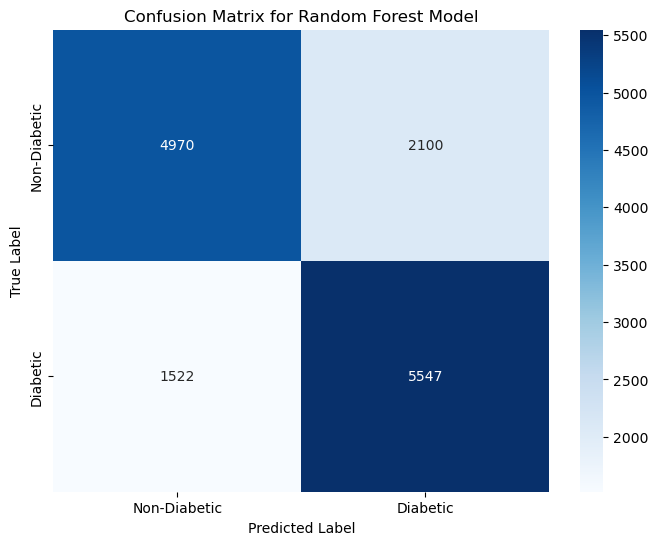

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Define features and target
X_rf = diabetes_data.drop('Diabetes_binary', axis=1)
y_rf = diabetes_data['Diabetes_binary']

#Splitting the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, stratify=y_rf, random_state=42)

#Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

#Train the classifier
rf_classifier.fit(X_train_rf, y_train_rf)

#Predictions
y_pred_rf = rf_classifier.predict(X_test_rf)

#Evaluation
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test_rf, rf_classifier.predict_proba(X_test_rf)[:, 1])
report_rf = classification_report(y_test_rf, y_pred_rf)

#Print the performance metrics
print(f"Random Forest Model Accuracy: {accuracy_rf:.2%}")
print(f"Random Forest Model ROC-AUC: {roc_auc_rf:.2%}\n")
print("Random Forest Classification Report:")
print(report_rf)

#Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model Fine-tuning

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 666, in _valida

Fine Tuned Random Forest Model Accuracy: 75.56%
Fine Tuned Random Forest Model ROC-AUC: 83.08%

Fine Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7070
         1.0       0.74      0.80      0.77      7069

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139



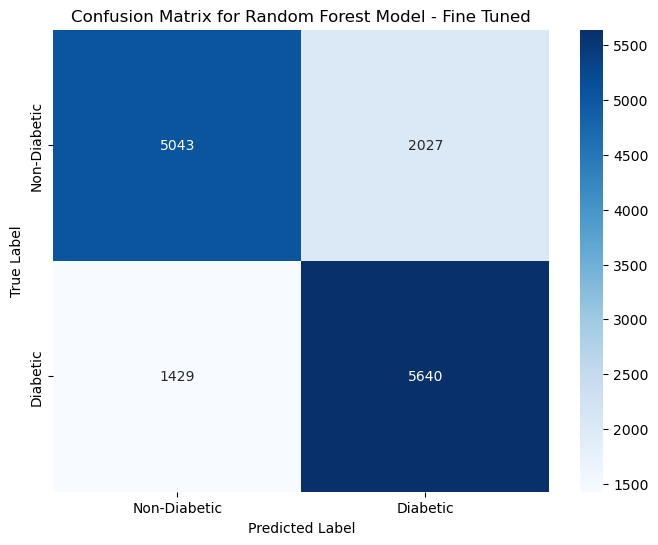

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

X_rf_ft = diabetes_data.drop('Diabetes_binary', axis=1)
y_rf_ft = diabetes_data['Diabetes_binary']

#Splitting the data into training and testing sets 
X_train_rf_ft, X_test_rf_ft, y_train_rf_ft, y_test_rf_ft = train_test_split(X_rf_ft, y_rf_ft, test_size=0.2, stratify=y_rf_ft, random_state=42)

#Define the parameter grid to scan
param_grid_rf_ft = {
    'n_estimators': [50, 100],  
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2]  #Important for preventing overfitting
}

#Initialize the Random Forest classifier 
rf_classifier_ft = RandomForestClassifier(random_state=42)

#Initialize Grid Search with cross-validation
grid_search_rf_ft = GridSearchCV(estimator=rf_classifier_ft, param_grid=param_grid_rf_ft, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

#Perform Grid Search
grid_search_rf_ft.fit(X_train_rf_ft, y_train_rf_ft)

#Best model after grid search
best_rf_classifier_ft = grid_search_rf_ft.best_estimator_

#Predictions
y_pred_rf_ft = best_rf_classifier_ft.predict(X_test_rf_ft)

#Evaluate the best model
accuracy_rf_ft = accuracy_score(y_test_rf_ft, y_pred_rf_ft)
roc_auc_rf_ft = roc_auc_score(y_test_rf_ft, best_rf_classifier_ft.predict_proba(X_test_rf_ft)[:, 1])
report_rf_ft = classification_report(y_test_rf_ft, y_pred_rf_ft)
conf_matrix_rf_ft = confusion_matrix(y_test_rf_ft, y_pred_rf_ft)

#Print the performance metrics
print(f"Fine Tuned Random Forest Model Accuracy: {accuracy_rf_ft:.2%}")
print(f"Fine Tuned Random Forest Model ROC-AUC: {roc_auc_rf_ft:.2%}\n")
print("Fine Tuned Random Forest Classification Report:")
print(report_rf_ft)

#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_ft, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Random Forest Model - Fine Tuned')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Socio-Demographic Features

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 666, in _valida

Socio-Demographic Fine Tuned Random Forest Model Accuracy: 65.41%
Socio-Demographic Fine Tuned Random Forest Model ROC-AUC: 70.88%

Socio-Demographic Fine Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.56      0.62      7070
         1.0       0.63      0.75      0.68      7069

    accuracy                           0.65     14139
   macro avg       0.66      0.65      0.65     14139
weighted avg       0.66      0.65      0.65     14139



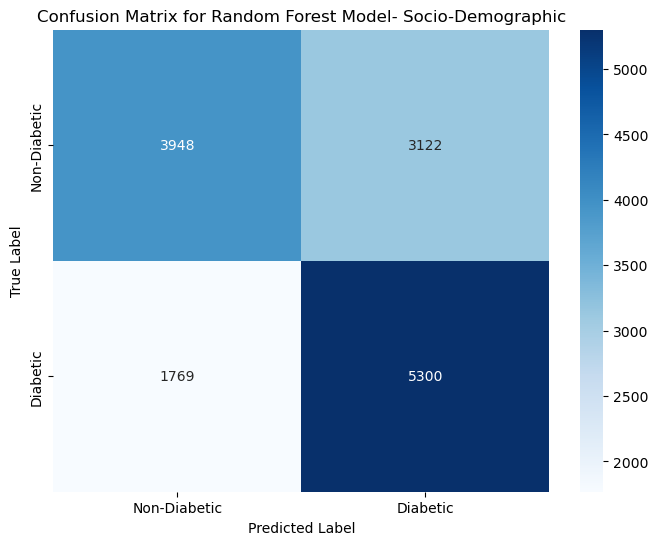

In [36]:
#Extract Socio-demographic features list
socio_demo_features = ['Income', 'Education', 'Age', 'Sex', 'NoDocbcCost', 'AnyHealthcare']

#Define features and target using only socio-demographic factors
X_rf_socio_ft = diabetes_data[socio_demo_features]
y_rf_socio_ft = diabetes_data['Diabetes_binary']

#Split the data into training and testing sets 
X_train_rf_socio_ft, X_test_rf_socio_ft, y_train_rf_socio_ft, y_test_rf_socio_ft = train_test_split(
    X_rf_socio_ft, y_rf_socio_ft, test_size=0.2, stratify=y_rf_socio_ft, random_state=42)

#Initialize the Random Forest classifier
rf_classifier_socio_ft = RandomForestClassifier(random_state=42)

#Grid Search with cross-validation
grid_search_rf_socio_ft = GridSearchCV(estimator=rf_classifier_socio_ft, param_grid=param_grid_rf_ft, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf_socio_ft.fit(X_train_rf_socio_ft, y_train_rf_socio_ft)

#Best model for socio-demographic features
best_rf_socio_ft = grid_search_rf_socio_ft.best_estimator_

#Predictions 
y_pred_rf_socio_ft = best_rf_socio_ft.predict(X_test_rf_socio_ft)

#Evaluation
accuracy_rf_socio_ft = accuracy_score(y_test_rf_socio_ft, y_pred_rf_socio_ft)
roc_auc_rf_socio_ft = roc_auc_score(y_test_rf_socio_ft, best_rf_socio_ft.predict_proba(X_test_rf_socio_ft)[:, 1])
report_rf_socio_ft = classification_report(y_test_rf_socio_ft, y_pred_rf_socio_ft)

#Print the performance metrics
print(f"Socio-Demographic Fine Tuned Random Forest Model Accuracy: {accuracy_rf_socio_ft:.2%}")
print(f"Socio-Demographic Fine Tuned Random Forest Model ROC-AUC: {roc_auc_rf_socio_ft:.2%}\n")
print("Socio-Demographic Fine Tuned Random Forest Classification Report:")
print(report_rf_socio_ft)

#Confusion Matrix
conf_matrix_rf_socio_ft = confusion_matrix(y_test_rf_socio_ft, y_pred_rf_socio_ft)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_socio_ft, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Random Forest Model- Socio-Demographic')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Combined Feature Set

In [37]:
import pandas as pd
import numpy as np

#Get feature importances
importances = best_rf_classifier_ft.feature_importances_

#Get feature names from the training DataFrame
feature_names = X_train_rf_ft.columns

#Create a DataFrame from the feature importances
feature_importances_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

#Sort the DataFrame by the importance of the features
feature_importances_df_rf.sort_values(by='Importance', ascending=False, inplace=True)

#Reset index 
feature_importances_df_rf.reset_index(drop=True, inplace=True)
print(feature_importances_df_rf)

                 Feature  Importance
0                GenHlth    0.226403
1                 HighBP    0.218650
2                    BMI    0.140908
3                    Age    0.097641
4               HighChol    0.088715
5               DiffWalk    0.048818
6                 Income    0.036110
7               PhysHlth    0.028731
8   HeartDiseaseorAttack    0.027040
9              Education    0.014991
10              MentHlth    0.011869
11          PhysActivity    0.010224
12     HvyAlcoholConsump    0.009051
13             CholCheck    0.008660
14                   Sex    0.008593
15                Stroke    0.005691
16                Smoker    0.004592
17                Fruits    0.004193
18               Veggies    0.003566
19           NoDocbcCost    0.003004
20         AnyHealthcare    0.002549


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 666, in _valida

Combined Feature Set Fine Tuned Random Forest Model Accuracy: 75.51%
Combined Feature Set Fine Tuned Random Forest Model ROC-AUC: 82.84%

Combined Feature Set Fine Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      7070
         1.0       0.74      0.79      0.76      7069

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.75     14139
weighted avg       0.76      0.76      0.75     14139



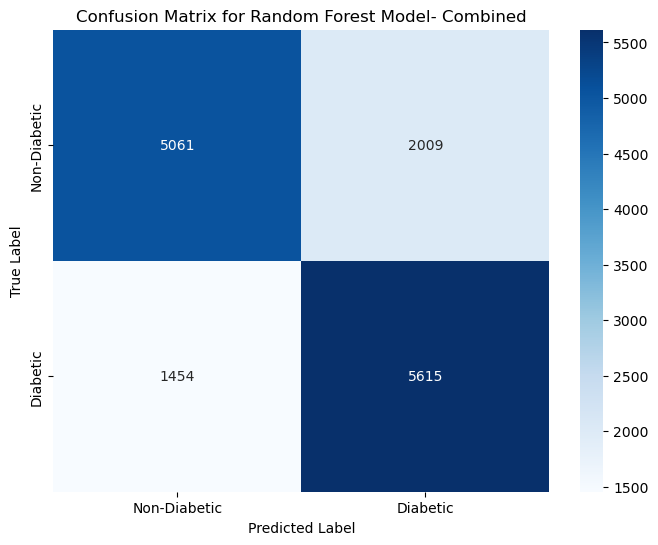

In [38]:
#Define features and target using the selected combined feature set
combined_features_rf = feature_importances_df_rf.head(10)['Feature'].tolist()

#Define features and targe
X_rf_combined_ft = diabetes_data[combined_features_rf]
y_rf_combined_ft = diabetes_data['Diabetes_binary']

#Split the data for combined feature set
X_train_rf_combined_ft, X_test_rf_combined_ft, y_train_rf_combined_ft, y_test_rf_combined_ft = train_test_split(
    X_rf_combined_ft, y_rf_combined_ft, test_size=0.2, stratify=y_rf_combined_ft, random_state=42)

#Initialize the Random Forest classifier for combined features
rf_classifier_combined_ft = RandomForestClassifier(random_state=42)

#Grid Search with cross-validation for combined features
grid_search_rf_combined_ft = GridSearchCV(estimator=rf_classifier_combined_ft, param_grid=param_grid_rf_ft, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf_combined_ft.fit(X_train_rf_combined_ft, y_train_rf_combined_ft)

#Best model for combined features
best_rf_combined_ft = grid_search_rf_combined_ft.best_estimator_

#Predictions 
y_pred_rf_combined_ft = best_rf_combined_ft.predict(X_test_rf_combined_ft)

#Evaluation
accuracy_rf_combined_ft = accuracy_score(y_test_rf_combined_ft, y_pred_rf_combined_ft)
roc_auc_rf_combined_ft = roc_auc_score(y_test_rf_combined_ft, best_rf_combined_ft.predict_proba(X_test_rf_combined_ft)[:, 1])
report_rf_combined_ft = classification_report(y_test_rf_combined_ft, y_pred_rf_combined_ft)

#Print the performance metrics
print(f"Combined Feature Set Fine Tuned Random Forest Model Accuracy: {accuracy_rf_combined_ft:.2%}")
print(f"Combined Feature Set Fine Tuned Random Forest Model ROC-AUC: {roc_auc_rf_combined_ft:.2%}\n")
print("Combined Feature Set Fine Tuned Random Forest Classification Report:")
print(report_rf_combined_ft)

#Confusion Matrix
conf_matrix_rf_combined_ft = confusion_matrix(y_test_rf_combined_ft, y_pred_rf_combined_ft)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_combined_ft, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Random Forest Model- Combined')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 7. Ensemble Model

Ensemble Model Accuracy: 72.83%
Ensemble Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74      7070
         1.0       0.74      0.70      0.72      7069

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



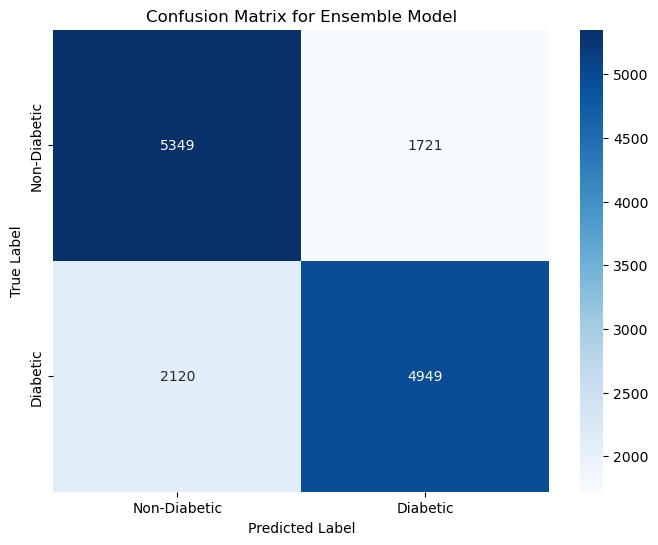

In [39]:
from scipy.stats import mode
import numpy as np

#Assuming y_pred_rf_combined_ft, y_pred_combined_dt, y_pred_xgb_combined, y_pred_nb_combined, y_pred_svm_combined, y_pred_lr_combined are available

#Stack the predictions array-wise
predictions = np.column_stack([
    y_pred_rf_combined_ft,
    y_pred_combined_dt,
    y_pred_xgb_combined,
    y_pred_nb_combined,
    y_pred_svm_combined,
    y_pred_lr_combined
])

#Apply voting mechanism
final_predictions, _ = mode(predictions, axis=1)
final_predictions = final_predictions.flatten()  

#Evaluation of the ensemble model
ensemble_accuracy = accuracy_score(y_test_rf_combined_ft, final_predictions)
ensemble_report = classification_report(y_test_rf_combined_ft, final_predictions)
ensemble_conf_matrix = confusion_matrix(y_test_rf_combined_ft, final_predictions)

#Print ensemble performance metrics
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.2%}")
print("Ensemble Model Classification Report:")
print(ensemble_report)

#Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()